<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Analytics/211222_Alexa_Reviews_Bruno_Tucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Background


BT: The Amazon Alexa dataset consists of 3,000 rows of customer reviews for  Alexa devices including the Dot, Spot, and Fire TV Stick, as well as well the colors for unspecified devices including Charcoal Fabric, Oak Finish, and White . There were sixteen device model and/or color "varaiations." Star ratings of up to 5 stars and the date of review are also included. The objective is to perform sentiment analysis, i.e. to see how well the star ratings and variation could predict whether the customers would write a positive or negative review.

### Data Acquisition - Natural Language Processing Model

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
alexa_sentiment = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', sep='\t')

## Exploratory Data Analysis

In [ ]:
alexa_sentiment.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
alexa_sentiment.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
alexa_sentiment.shape

(3150, 5)

In [ ]:
alexa_sentiment.count().isnull()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [ ]:
alexa_sentiment.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
round(alexa_sentiment.describe(), 2)

,rating,feedback
count,3150.00,3150.00
mean,4.46,0.92
std,1.07,0.27
min,1.00,0.00
25%,4.00,1.00
50%,5.00,1.00
75%,5.00,1.00
max,5.00,1.00


In [ ]:
alexa_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [43]:
import seaborn as sns
import matplotlib.pyplot as plot

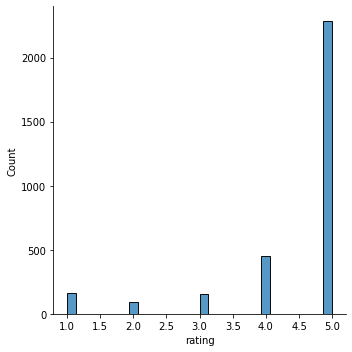

In [44]:
sns.displot(alexa_sentiment['rating'])

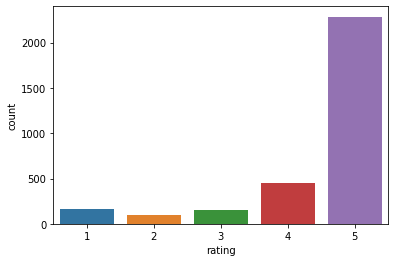

In [45]:
sns.countplot(x = "rating", data = alexa_sentiment)

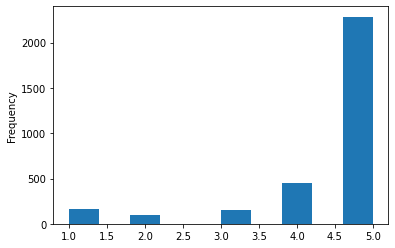

In [46]:
alexa_sentiment['rating'].plot(kind = 'hist')

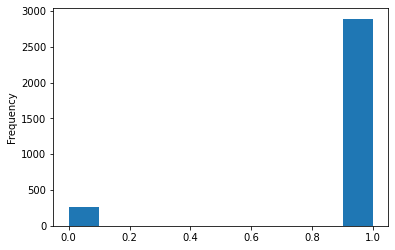

In [47]:
alexa_sentiment['feedback'].plot(kind = 'hist')

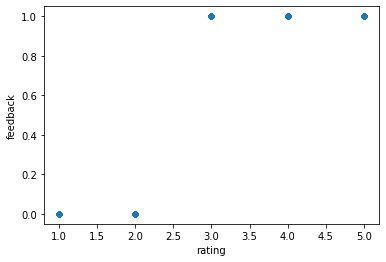

In [48]:
alexa_sentiment.plot(kind = "scatter", x = 'rating', y = 'feedback')

In [ ]:
alexa_sentiment.groupby(['feedback', 'rating']).count()

date  variation  verified_reviews
feedback rating                                   
0        1        161        161               161
         2         96         96                96
1        3        152        152               152
         4        455        455               455
         5       2286       2286              2286

BT: There are (161 + 96 = ) 257 negative feedbacks and (152 + 455 + 2,286 = ) 2,893 positive feedbacks. The positive feedback percentage was 2,893/3,150 = 92%.

A feedback score of 0 has a rating of 1 or 2. A feedback score of 1 has a rating of 3, 4, or 5. Using a logistic regression model wouldn't add to the predictive value already evident from this summarization. In other words, with feedback as the dependent variable, it is already known that a rating of 1 or 2 predicts a feedback of 0, and a rating of 3, 4, or 5 predicts a feedback of 1. Combining the 'variation' variable (e.g. Charcoal Fabric), which is the only other variable of the other 3 variables that could possibly make sense as an independent variable (date and verified_reviews wouldn't make sense), with the rating variable won't diminish the already-established fact that a rating of 1 or 2  predicts a feedback of 0, and a rating of 3, 4, or 5 predicts a feedback of 1. 

In [ ]:
alexa_sentiment.groupby(['variation', 'rating'])['rating'].count() [:50]

variation                     rating
Black                         1          30
                              2           5
                              3          15
                              4          35
                              5         176
Black  Dot                    1          22
                              2          14
                              3          34
                              4          84
                              5         362
Black  Plus                   1          17
                              2          11
                              3          14
                              4          41
                              5         187
Black  Show                   1          10
                              2           8
                              3          14
                              4          43
                              5         190
Black  Spot                   1          18
                              2        

In [ ]:
alexa_sentiment.groupby(['variation', 'feedback'])['feedback'].count() [:50]


variation                     feedback
Black                         0            35
                              1           226
Black  Dot                    0            36
                              1           480
Black  Plus                   0            28
                              1           242
Black  Show                   0            18
                              1           247
Black  Spot                   0            32
                              1           209
Charcoal Fabric               0            12
                              1           418
Configuration: Fire TV Stick  0            28
                              1           322
Heather Gray Fabric           0             2
                              1           155
Oak Finish                    1            14
Sandstone Fabric              0             6
                              1            84
Walnut Finish                 1             9
White                         0          

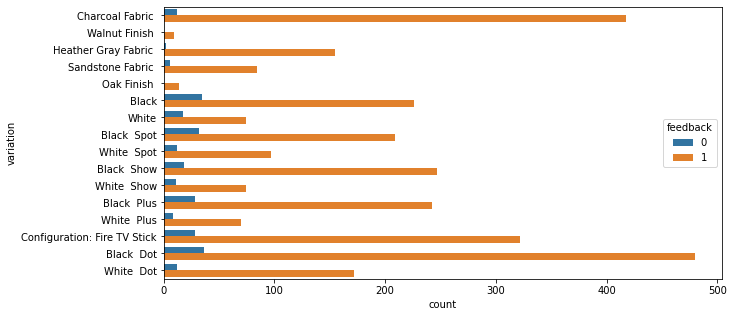

In [52]:
fig = plot.figure(figsize=(10,5))
sns.countplot(y = 'variation', hue = 'feedback', data = alexa_sentiment)


In [ ]:
round(alexa_sentiment.groupby(['variation'])['rating'].mean(), 2)

variation
Black                           4.23
Black  Dot                      4.45
Black  Plus                     4.37
Black  Show                     4.49
Black  Spot                     4.31
Charcoal Fabric                 4.73
Configuration: Fire TV Stick    4.59
Heather Gray Fabric             4.69
Oak Finish                      4.86
Sandstone Fabric                4.36
Walnut Finish                   4.89
White                           4.14
White  Dot                      4.42
White  Plus                     4.36
White  Show                     4.28
White  Spot                     4.31
Name: rating, dtype: float64

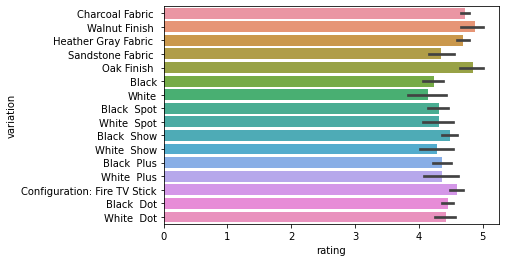

In [ ]:
sns.barplot(x = 'rating', y = 'variation', data = alexa_sentiment)

In [ ]:
round(alexa_sentiment.groupby(['variation'])['feedback'].mean(), 2)


variation
Black                           0.87
Black  Dot                      0.93
Black  Plus                     0.90
Black  Show                     0.93
Black  Spot                     0.87
Charcoal Fabric                 0.97
Configuration: Fire TV Stick    0.92
Heather Gray Fabric             0.99
Oak Finish                      1.00
Sandstone Fabric                0.93
Walnut Finish                   1.00
White                           0.81
White  Dot                      0.93
White  Plus                     0.90
White  Show                     0.87
White  Spot                     0.89
Name: feedback, dtype: float64

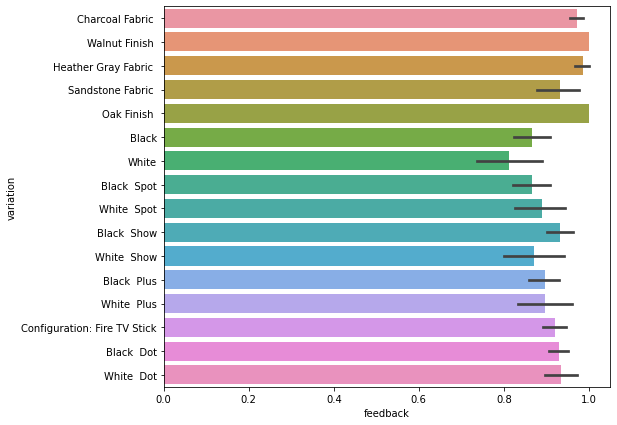

In [61]:
fig = plot.figure(figsize=(8,7))
sns.barplot(x = 'feedback', y = 'variation', data = alexa_sentiment)

In [ ]:
sorted(alexa_sentiment['verified_reviews'].apply(len), reverse = False) [:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

BT: The shortest reviews consisted of 10 characters. Some of these were emojies. 

In [ ]:
sorted(alexa_sentiment['verified_reviews'].apply(len), reverse = True) [:10]

[2851, 2393, 1954, 1833, 1686, 1564, 1360, 1330, 1311, 1309]

BT: The longest review had 2,851 characters. 

In [ ]:
review_2851 = alexa_sentiment[alexa_sentiment['verified_reviews'].apply(len)==2851]
review_2851['verified_reviews']

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

In [ ]:
#alexa_sentiment['length'] = alexa_sentiment['verified_reviews'].apply(len)
#alexa_sentiment.groupby(['verified_reviews'])['length']
#sorted(alexa_sentiment['length'] )

### Data Wrangling - Natural Language Processing Model

In [62]:
import string

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [64]:
from nltk.corpus import stopwords

In [65]:
stopwords.words('english')[0:12]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll"]

In [66]:
def alexa_review_text_pre_process(text_review):
  remove_punct = [char for char in text_review if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords

In [67]:
alexa_sentiment['verified_reviews'].head(10).apply(alexa_review_text_pre_process)

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
5    [received, echo, gift, needed, another, Blueto...
6    [Without, cellphone, cannot, use, many, featur...
7    [think, 5th, one, Ive, purchased, Im, working,...
8                                       [looks, great]
9    [Love, I’ve, listened, songs, haven’t, heard, ...
Name: verified_reviews, dtype: object

In [169]:
alexa_sentiment.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# Vectorization (Natural Language Processing Model)

In [199]:
from sklearn.feature_extraction.text import CountVectorizer

In [200]:
bag_of_words = CountVectorizer(analyzer=alexa_review_text_pre_process).fit(alexa_sentiment['verified_reviews'])

In [201]:
bag_of_words_trf = bag_of_words.transform(alexa_sentiment['verified_reviews'])

# TF-IDF (Transformer) (Natural Language Processing Model)

In [227]:
from sklearn.feature_extraction.text import TfidfTransformer

In [228]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)

In [229]:
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

# Model Building (Natural Language Processing Model)


In [230]:
from sklearn.naive_bayes import MultinomialNB

In [231]:
alexa_review_model = MultinomialNB().fit(tfidf_trf,alexa_sentiment['feedback'])

In [232]:
test_review = alexa_sentiment['verified_reviews'][1]

In [233]:
test_review

'Loved it!'

In [234]:
bag_of_words_test_review = bag_of_words.transform([test_review])

In [235]:
tfidf_test_review = tfidf_fit.transform(bag_of_words_test_review)

In [237]:
alexa_review_model.predict(tfidf_test_review)[0]

1

In [238]:
prediction_for_all_reviews = alexa_review_model.predict(tfidf_trf)

In [239]:
from sklearn.metrics import classification_report

In [240]:
print(classification_report(alexa_sentiment['feedback'],prediction_for_all_reviews))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       257
           1       0.92      1.00      0.96      2893

    accuracy                           0.92      3150
   macro avg       0.96      0.52      0.51      3150
weighted avg       0.93      0.92      0.89      3150



BT: Precision (1.00 for negative feedback, .93 weighted average) is the better metric for the Alexa dataset. Precision = True Positives / (True Positives + False Positives). The low recall score (.03) appears to be due to an abundance of false negatives when considering that recall = True Positives / (True Positives + False Negatives). The low recall score is bring down the f1-score also because f1 = 2 * (precision * recall)/(precision + recall). 

# Train Test Split

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
review_train, review_test, class_train, class_test = train_test_split(alexa_sentiment['verified_reviews'],alexa_sentiment['feedback']) 

In [217]:
print(review_train.shape)
print(review_test.shape)
print(class_train.shape)
print(class_test.shape)

(2362,)
(788,)
(2362,)
(788,)


BT: The default of 788 / (788 + 2,361) = 25% of the reviews are used for training. 

# Pipeline Building

In [218]:
from sklearn.pipeline import Pipeline

In [219]:
text_pipeline = Pipeline([
                          ('bag_of_words',CountVectorizer(analyzer=alexa_review_text_pre_process)),
                          ('tfidf',TfidfTransformer()),
                          ('classifier', MultinomialNB())
])

In [220]:
text_pipeline.fit(review_train, class_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function alexa_review_text_pre_process at 0x7f84181850e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [221]:
text_pred = text_pipeline.predict(review_test)

In [222]:
print(classification_report(text_pred, class_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.93      0.97       788

    accuracy                           0.93       788
   macro avg       0.50      0.47      0.48       788
weighted avg       1.00      0.93      0.97       788



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BT: The 788 reviews used for training showed an overall precision of 1.00 when predicting whether the review would be positive (1) or negative (0). It appears that the training sample didn't include negative feedback data, even after I re-ran the train-test split. The positive feedback was 92% so it is possible that the negative feedbacks were missed in the training sample. 

In [244]:
review_test.iloc[63]

"It's great sound and video quality"

In [224]:
class_test.iloc[63]

1

In [225]:
text_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

BT: The above array shows that no negative feedback was predicted using the sample of 788 data points.  

In [248]:
class_test

1451    1
1952    1
193     1
1256    1
2040    1
       ..
2131    1
2860    1
2415    1
2093    1
1349    1
Name: feedback, Length: 788, dtype: int64

## Data Acquisition - Random Forest Model

BT: The Random Forest Model was selected to improve the accuracy score from the Natural Language Processing Model. 

In [256]:
alexa_sentiment2 = alexa_sentiment[ ['feedback', 'rating', 'variation']]

In [257]:
alexa_sentiment2.head()

,feedback,rating,variation
0,1,5,Charcoal Fabric
1,1,5,Charcoal Fabric
2,1,4,Walnut Finish
3,1,5,Charcoal Fabric
4,1,5,Charcoal Fabric


BT: The date of the review was dropped due to lack of predictive value for customer feedback. 

In [258]:
alexa_sentiment2.shape

(3150, 3)

In [259]:
alexa_sentiment2.isnull().sum()

feedback     0
rating       0
variation    0
dtype: int64

## Data Wrangling - Random Forest Model

In [260]:
!pip install category_encoders

In [261]:
import category_encoders as cten

In [276]:
encoded_data = cten.OrdinalEncoder(cols=['variation'])

In [277]:
enc_data_df = encoded_data.fit_transform(alexa_sentiment2)

In [278]:
enc_data_df.head(50)

,feedback,rating,variation
0,1,5,1
1,1,5,1
2,1,4,2
3,1,5,1
4,1,5,1
5,1,5,3
6,1,3,4
7,1,5,1
8,1,5,3
9,1,5,3


In [285]:
enc_data_df.groupby(['variation', 'rating'])['rating'].count() [:80]

variation  rating
1          1           4
           2           8
           3          10
           4          56
           5         352
                    ... 
16         1          10
           2           2
           3          12
           4          36
           5         124
Name: rating, Length: 73, dtype: int64

BT: There are 16 encoded variations (1, 2, . . . ) corresponding with the 16 unencoded variations (Charcoal Fabric, Walnut Finish, etc.)

In [286]:
enc_data_df.groupby(['variation', 'feedback'])['feedback'].count() [:80]

variation  feedback
1          0            12
           1           418
2          1             9
3          0             2
           1           155
4          0             6
           1            84
5          1            14
6          0            35
           1           226
7          0            17
           1            74
8          0            32
           1           209
9          0            12
           1            97
10         0            18
           1           247
11         0            11
           1            74
12         0            28
           1           242
13         0             8
           1            70
14         0            28
           1           322
15         0            36
           1           480
16         0            12
           1           172
Name: feedback, dtype: int64

In [288]:
X = enc_data_df.drop(['feedback'], axis=1)

In [289]:
X.head()

,rating,variation
0,5,1
1,5,1
2,4,2
3,5,1
4,5,1


In [290]:
Y = enc_data_df['rating']

In [291]:
Y.head()

0    5
1    5
2    4
3    5
4    5
Name: rating, dtype: int64

## Random Forest Model Building

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=65)

In [294]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2110, 2)
(1040, 2)
(2110,)
(1040,)


BT: 2,110 / 3,150 = 67%
1,040 / 3,150 = 33%

In [308]:
from sklearn.tree import DecisionTreeClassifier

In [335]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 90, max_depth = 3)

In [336]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=90)

In [337]:
y_pred = dtc.predict(X_test)

In [338]:
from sklearn.metrics import accuracy_score

In [339]:
accuracy_score(y_test,y_pred)

0.9701923076923077

In [340]:
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree

In [341]:
X_train.columns

Index(['rating', 'variation'], dtype='object')

In [342]:
dot_img = tree.export_graphviz(dtc, out_file='alexa_dtc.dot',feature_names=X_train.columns,class_names=['1','2','3','4','5'],max_depth=3,filled=True,rounded=True)

In [343]:
graph_tree = pydotplus.graph_from_dot_file('alexa_dtc.dot')

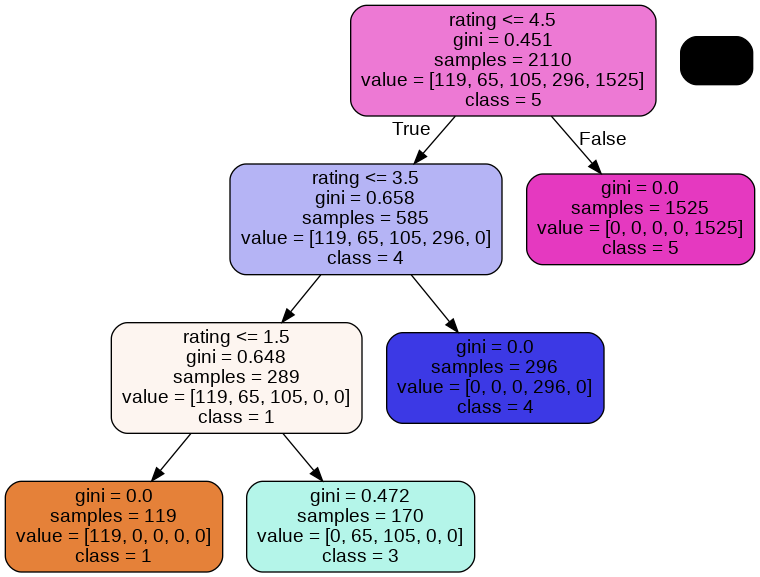

In [344]:
Image(graph_tree.create_png())

In [345]:
dtc.feature_importances_

array([1., 0.])

In [346]:
decision_tree_feaure_importance = pd.Series(dtc.feature_importances_,index=X_train.columns)

In [347]:
dt_feature_imp = decision_tree_feaure_importance.sort_values(ascending=False)

In [348]:
decision_tree_feaure_importance.sort_values(ascending=False)

rating       1.0
variation    0.0
dtype: float64

BT: The star rating (1-5) had predictive value (1.0 for customer feedback (0 or 1), but the variation of the Alexa device did not (0.0). 

In [349]:
import seaborn as sns

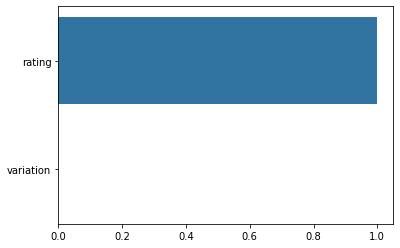

In [350]:
sns.barplot(x=dt_feature_imp,y=dt_feature_imp.index)

### Conclusion

BT: Exploratory data analysis showed that the customers' positive feedback rate for the Amazon Alexa products was 92% overall. The Natural Language Processing Model was able to predict positive feedback with an accuracy of 93%. Negative feedback prediction with the NLP model was, however, questionable, likely due to not enough negative feedback instances in the training sample. The Random Forest Model had an accuracy score of 97% and showed that the customer star rating of 1-5 had importance in predicting a positive or negative customer feedback, but the Alexa model variation was not important in this prediction.  